<a href="https://colab.research.google.com/github/ptnv-s/IEMCT-ESOM-ML_for_Stock_Price_Prediction/blob/main/IEMCT_ESOM_ML_for_Stock_Price_Prediction_PROJECT_STARTER_KIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Important Libraries 


*   Numpy- Used for Linear Algebra
*   Pandas - Used for data processing / reading dataset
*   Seaborn and Matplotlib - Used for graphical representation



In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


###Downloading the dataset for Project

In [2]:
%%bash
wget https://www.dropbox.com/s/rqyki06qf9msiol/HDFCBANK.csv

--2021-10-19 05:36:33--  https://www.dropbox.com/s/rqyki06qf9msiol/HDFCBANK.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/rqyki06qf9msiol/HDFCBANK.csv [following]
--2021-10-19 05:36:34--  https://www.dropbox.com/s/raw/rqyki06qf9msiol/HDFCBANK.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb33058a724771a523171c52a28.dl.dropboxusercontent.com/cd/0/inline/BYUyC5D474Ljqt2dF1YsfhhV6UFStZXVloI8eK26WVHPfEzqk5bfteQBFrd7TPdo6TTg7c5BQS7GGxHhMoOk4rZghDuHSHFK4jVgvqggjx79O_U6KZhTy3mZMawvS7dqxlmhZhrWnZ3FcC4NQQzFYNJd/file# [following]
--2021-10-19 05:36:34--  https://ucb33058a724771a523171c52a28.dl.dropboxusercontent.com/cd/0/inline/BYUyC5D474Ljqt2dF1YsfhhV6UFStZXVloI8eK26WVHPfEzqk5bfteQBFrd7TPdo6TTg7c5BQS7GGxHhMoOk4rZ

###Reading and Viewing the dataset using Pandas

In [3]:
df = pd.read_csv('HDFCBANK.csv')
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,NaN,NaN,NaN
1,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,NaN,NaN,NaN
2,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,NaN,NaN,NaN
3,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,NaN,NaN,NaN
4,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,NaN,NaN,NaN


####Plotting a Correlation Heatmap

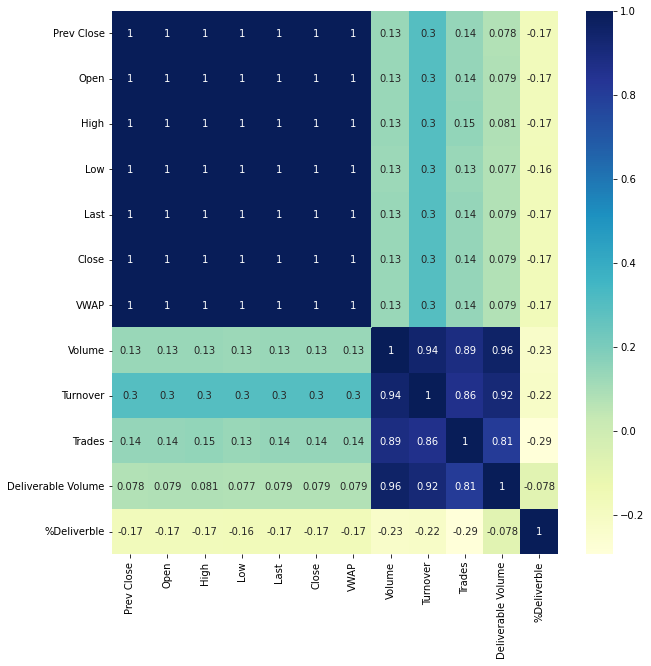

In [4]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

####Generating New Features based on Important features

In [5]:
data = df[['Date','Open','High','Low','Volume','VWAP']]

#####Setting Index as Date

In [6]:
df.set_index("Date", drop=False, inplace=True)

#####Visual Representation of Closing Price

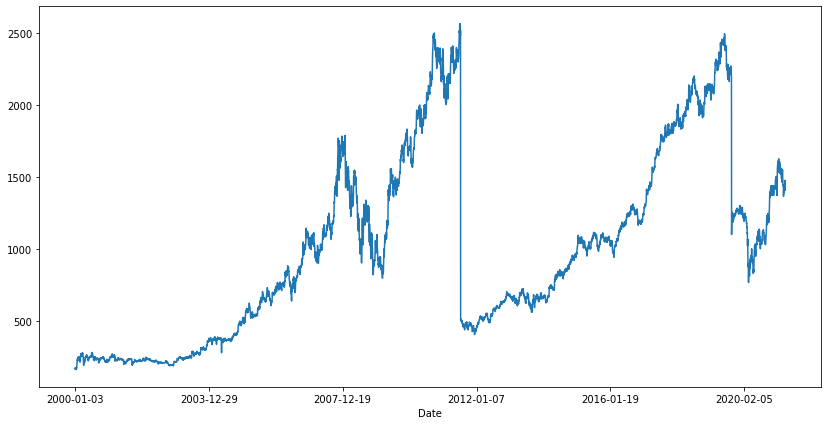

In [7]:
df.Close.plot(figsize=(14, 7))

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    5306 non-null   object 
 1   Open    5306 non-null   float64
 2   High    5306 non-null   float64
 3   Low     5306 non-null   float64
 4   Volume  5306 non-null   int64  
 5   VWAP    5306 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 248.8+ KB


####Generating New Features - Lag and Window Features for features related to Closing Price

In [9]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low","VWAP"]
window1 = 3
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

####Setting All Null/NaN values of a feature as mean of that feature

In [10]:
df.fillna(df.mean(), inplace=True)

####Setting Date as Index and viewing Dataset

In [11]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7
Date,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,82923.625407,1.261883e+06,0.595003,1007.146851,19.402134,1019.656921,18.155846,993.502808,18.507912,1006.602844,17.706951
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,82923.625407,1.261883e+06,0.595003,166.000000,19.402134,170.000000,18.155846,166.000000,18.507912,169.520004,17.706951
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,82923.625407,1.261883e+06,0.595003,174.000000,11.313708,176.725006,9.510586,168.500000,3.535534,172.255005,3.867874
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,82923.625407,1.261883e+06,0.595003,172.666672,8.326664,175.783340,6.919959,167.333328,3.214550,171.236664,3.254417
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,82923.625407,1.261883e+06,0.595003,173.333328,7.187953,175.783340,6.347096,167.100006,2.814694,170.876663,3.002692


###Extracting Date Time Features from the dataset 


In [12]:
df.Date = pd.to_datetime(df.Date, format="%Y-%m-%d")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Open_mean_lag3,Open_std_lag7,High_mean_lag3,High_std_lag7,Low_mean_lag3,Low_std_lag7,VWAP_mean_lag3,VWAP_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,2000-01-03,HDFCBANK,EQ,157.40,166.00,170.00,166.00,170.00,170.00,169.52,33259,5.638122e+11,82923.625407,1.261883e+06,0.595003,1007.146851,19.402134,1019.656921,18.155846,993.502808,18.507912,1006.602844,17.706951,1,3,0
2000-01-04,2000-01-04,HDFCBANK,EQ,170.00,182.00,183.45,171.00,174.00,173.80,174.99,168710,2.952261e+12,82923.625407,1.261883e+06,0.595003,166.000000,19.402134,170.000000,18.155846,166.000000,18.507912,169.520004,17.706951,1,4,1
2000-01-05,2000-01-05,HDFCBANK,EQ,173.80,170.00,173.90,165.00,168.00,166.95,169.20,159820,2.704094e+12,82923.625407,1.261883e+06,0.595003,174.000000,11.313708,176.725006,9.510586,168.500000,3.535534,172.255005,3.867874,1,5,2
2000-01-06,2000-01-06,HDFCBANK,EQ,166.95,168.00,170.00,165.30,168.95,168.30,168.44,85026,1.432166e+12,82923.625407,1.261883e+06,0.595003,172.666672,8.326664,175.783340,6.919959,167.333328,3.214550,171.236664,3.254417,1,6,3
2000-01-07,2000-01-07,HDFCBANK,EQ,168.30,162.15,171.00,162.15,170.75,168.35,166.79,85144,1.420158e+12,82923.625407,1.261883e+06,0.595003,173.333328,7.187953,175.783340,6.347096,167.100006,2.814694,170.876663,3.002692,1,7,4


####Removing Unneccesary features

In [13]:
df = df.drop(columns=['Symbol'])
df = df.drop(columns=['Series'])

#####Splitting Dataset into Training and Testing Data

In [14]:
df_train = df[df.Date < "2018"]
df_valid = df[df.Date >= "2018"]

In [15]:
df_valid.shape

(823, 24)

In [16]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

In [17]:
df_train.head().T

Date,2000-01-03,2000-01-04,2000-01-05,2000-01-06,2000-01-07
Date,2000-01-03 00:00:00,2000-01-04 00:00:00,2000-01-05 00:00:00,2000-01-06 00:00:00,2000-01-07 00:00:00
Prev Close,157.4,170,173.8,166.95,168.3
Open,166,182,170,168,162.15
High,170,183.45,173.9,170,171
Low,166,171,165,165.3,162.15
Last,170,174,168,168.95,170.75
Close,170,173.8,166.95,168.3,168.35
VWAP,169.52,174.99,169.2,168.44,166.79
Volume,33259,168710,159820,85026,85144
Turnover,5.63812e+11,2.95226e+12,2.70409e+12,1.43217e+12,1.42016e+12


###Scaling Data and Transforming it for Training

In [18]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [19]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [20]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

In [21]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

In [22]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()


In [23]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

### Importing XGBoost library

In [24]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

##XGBoost Tuning

XGBoost has a few parameters that can dramatically affect your model's accuracy and training speed.

We will go through some of them in this session

```
xgb = XGBRegressor(n_estimators=1000)
```

*   n_estimators specifies how many times to go through the modeling cycle described above.
*   Too low a value causes underfitting, which is inaccurate predictions on both training data and new data.
*    Too large a value causes overfitting, which is accurate predictions on training data, but inaccurate predictions on new data (which is what we care about).
*    You can experiment with your dataset to find the ideal. Typical values range from 100-1000, though this depends a lot on the learning rate.

```
xgb = XGBRegressor(learning_rate=0.01)
```

*   Learning Rate helps us in deciding the rate at which we want the parameters of model to change.
*   With a High Learning Rate a model can miss minimum loss.
*   For a low learning rate the process can be too slow.



```
xgb = XGBRegressor(max_depth=5)
```

*   It represents the depth of each tree, which is the maximum number of different features used in each tree. 
*   It's recommended going from a low max_depth (3 for instance) and then increasing it incrementally by 1, and stopping when there’s no performance gain of increasing it. 
*   This will help simplify your model and avoid overfitting

```
xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True)
```

*   Training Set
*   Evaluation Set
*   Verbose
*   Early Stopping 

```
xgb.fit(early_stopping_rounds='____')
```

*   The argument early_stopping_rounds offers a way to automatically find the ideal value.
*   Early stopping causes the model to stop iterating when the validation score stops improving, even if we aren't at the hard stop for n_estimators.


*   Since random chance sometimes causes a single round where validation scores don't improve, you need to specify a number for how many rounds of straight deterioration to allow before stopping. 
*   early_stopping_rounds = 10 is a reasonable value. Thus we stop after 5 straight rounds of deteriorating validation scores.
*   It's smart to set a high value for n_estimators and then use early_stopping_rounds to find the optimal time to stop iterating.

XGBoost has a multitude of other parameters, but these will go a very long way in helping you fine-tune your XGBoost model for optimal performance.

In [25]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[05:36:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.310905	validation_1-rmse:0.276292
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.307831	validation_1-rmse:0.273618
[2]	validation_0-rmse:0.304787	validation_1-rmse:0.271021
[3]	validation_0-rmse:0.301774	validation_1-rmse:0.268393
[4]	validation_0-rmse:0.298792	validation_1-rmse:0.265801
[5]	validation_0-rmse:0.295838	validation_1-rmse:0.263257
[6]	validation_0-rmse:0.292915	validation_1-rmse:0.260674
[7]	validation_0-rmse:0.29002	validation_1-rmse:0.258183
[8]	validation_0-rmse:0.287155	validation_1-rmse:0.255644
[9]	validation_0-rmse:0.284317	validation_1-rmse:0.253234
[10]	validation_0-rmse:0.281509	validation_1-rmse:0.25075
[11]	validation_0-rmse:0.278727	validation_1-rmse:0.24839
[12]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

<Figure size 864x576 with 0 Axes>

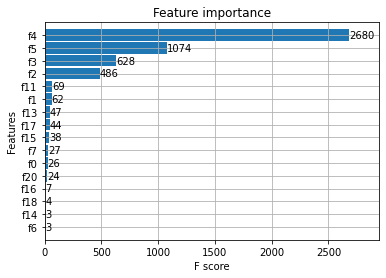

In [26]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

###Plotting Results of the Model

In [27]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

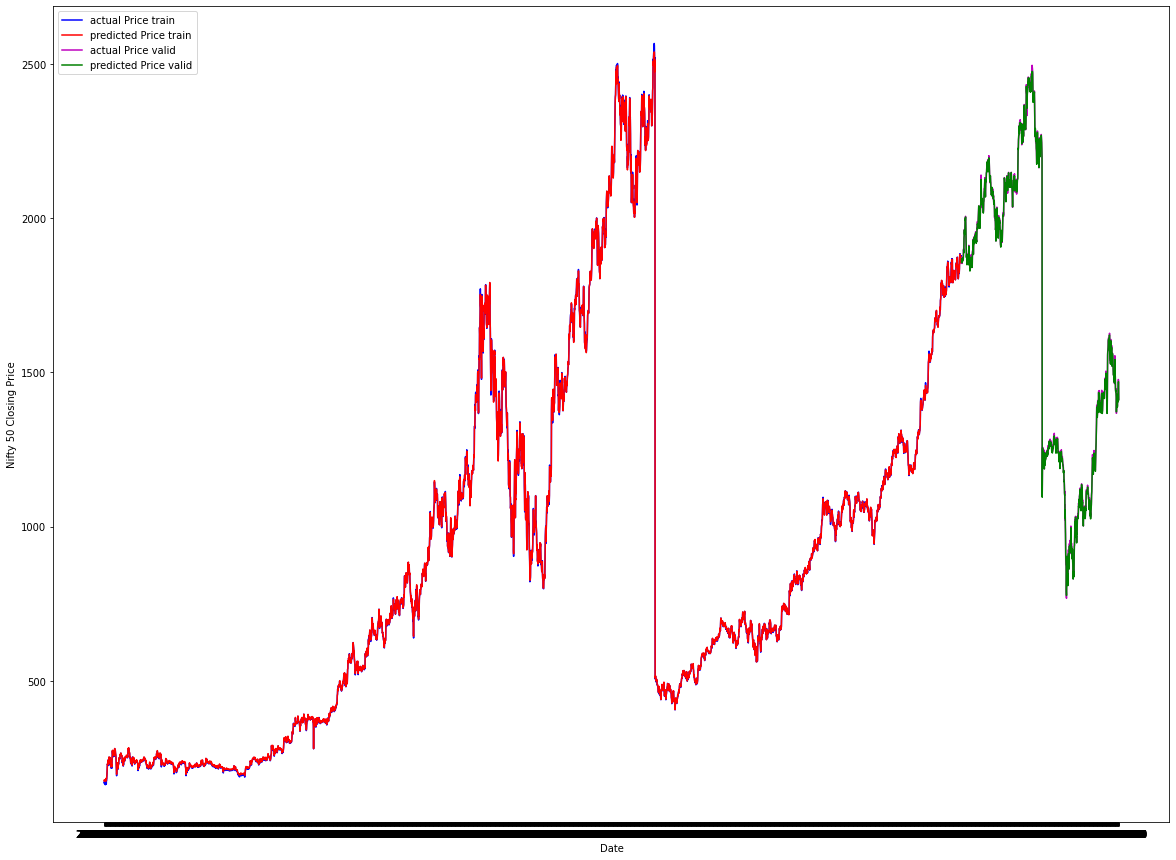

In [28]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

###Training Model Again 

In [29]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[05:37:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.310916	validation_1-rmse:0.276237
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.307852	validation_1-rmse:0.273518
[2]	validation_0-rmse:0.304818	validation_1-rmse:0.270832
[3]	validation_0-rmse:0.301814	validation_1-rmse:0.268185
[4]	validation_0-rmse:0.29884	validation_1-rmse:0.265567
[5]	validation_0-rmse:0.295896	validation_1-rmse:0.262956
[6]	validation_0-rmse:0.29298	validation_1-rmse:0.260387
[7]	validation_0-rmse:0.290093	validation_1-rmse:0.257847
[8]	validation_0-rmse:0.287234	validation_1-rmse:0.255313
[9]	validation_0-rmse:0.284404	validation_1-rmse:0.252821
[10]	validation_0-rmse:0.281602	validation_1-rmse:0.250334
[11]	validation_0-rmse:0.278827	validation_1-rmse:0.24789
[12]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.0099, max_delta_step=0,
             max_depth=15, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

###Plotting Results of the Model

In [30]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

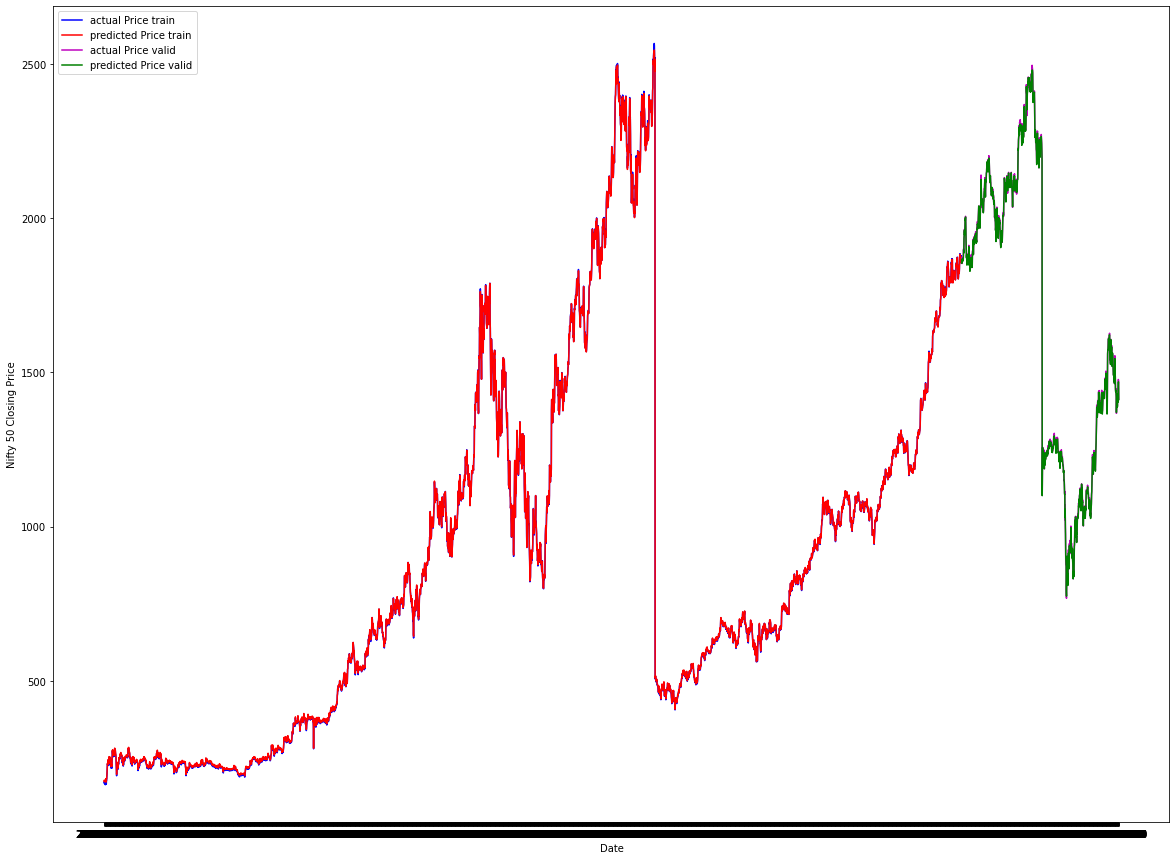

In [31]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()